In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv(r'C:\Users\light\Downloads\5. London Housing Data.csv')

In [3]:
df_london_housing= data.copy()

In [11]:
df_london_housing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN


In [12]:
df_london_housing['date']= pd.to_datetime(df_london_housing['date'])

In [16]:
df_london_housing.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [20]:
df_london_housing.isna().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [22]:
df_london_housing.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


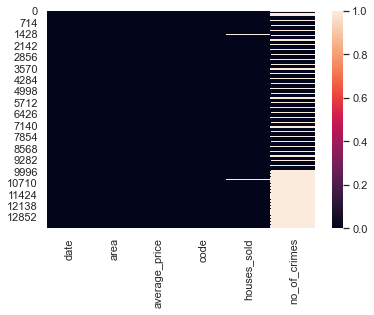

In [28]:
sns.heatmap(df_london_housing.isnull())
plt.show()

In [37]:
df_london_housing.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [40]:
# to add year column

df_london_housing['year']= [df_london_housing['date'][i].year for i in range(df_london_housing.shape[0])]

In [50]:
# to add month colum

df_london_housing['month']= df_london_housing['date'].dt.month

In [54]:
df_london_housing.drop('month', axis= 1, inplace= True)

In [59]:
# placing the new month column as 2nd column

df_london_housing.insert(loc= 1, column= 'month', value= df_london_housing['date'].dt.month)

In [63]:
df_london_housing.head(3)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995


In [66]:
# removing the year and month columns from DF
df_london_housing.drop(columns= ['month', 'year'], inplace= True)


KeyError: "['month' 'year'] not found in axis"

In [67]:
df_london_housing.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN


In [68]:
# next question

In [74]:
len(df_london_housing[df_london_housing['no_of_crimes'] == 0])

104

In [75]:
# max and min avg price

df_london_housing['average_price'].min()
df_london_housing['average_price'].max()

In [81]:
df_london_housing.insert(loc= 1, column= 'year', value= df_london_housing['date'].dt.year)

In [88]:
# max and min avg price per year


year  area                
1995  barking and dagenham      53700
      barnet                    93285
      bexley                    64958
      brent                     74310
      bromley                   82966
                               ...   
2020  waltham forest           452299
      wandsworth               610256
      west midlands            200628
      westminster             1019028
      yorks and the humber     165383
Name: average_price, Length: 1170, dtype: int64

In [104]:
london_data= df_london_housing[df_london_housing['area'] == 'england']

In [110]:
# max and min avg price per year
london_data.groupby('year')['average_price'].max()

year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [119]:
df_london_housing.groupby('area')['no_of_crimes'].min()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

In [125]:
df_london_housing[df_london_housing['average_price'] < 100000].loc[:, 'area'].value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
greenwich                59
south east               59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
ealing                   31
inner london             31
harrow                   30
kingston upon thames